In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# read csv file
df = pd.read_csv('train_FD001.txt', sep=' ', header=None)

# dropping NAN values
df = df.dropna(axis=1, how='all')

# Naming the columns
df.columns = ["unit", "cycles", "Op1",
                      "Op2", "Op3", "S1", "S2",
                      "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11",
                      "S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21"]

In [2]:
# data preprocessing; removing unnecessary data
df.drop(['Op3','S1', 'S5', 'S6', 'S16', 'S10', 'S18', 'S19'], axis=1, inplace=True)
df.head()

# MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,2:] = scaler.fit_transform(df.iloc[:,2:])
df

,unit,cycles,Op1,Op2,S2,S3,S4,S7,S8,S9,S11,S12,S13,S14,S15,S17,S20,S21
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,100,197,0.408046,0.083333,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,100,198,0.522989,0.500000,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,100,199,0.436782,0.750000,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [3]:
# add new column to show the max cycle of that unit
df = pd.merge(df, df.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')
df.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)

# Insert actual Remaining Useful Life (aRUL) column
df['aRUL'] = df['maxcycles'] - df['cycles']

In [4]:
# determining the fraction of the Remaining Useful Life (fRUL)  
# credits: Ruthger Righart (2018), Sensor time-series of aircraft engines. Retreived: https://rrighart.github.io/Gatu/ 

def fractionRUL(dat,q):
    return(dat.aRUL[q]-dat.aRUL.min()) / float(dat.aRUL.max()-dat.aRUL.min())

afRULz = []
afRUL = []

for i in range(df['unit'].min(),df['unit'].max()+1):
    dat=df[df.unit==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        afRULz = fractionRUL(dat, q)
        afRUL.append(afRULz)
df['afRUL'] = afRUL
df

,unit,cycles,Op1,Op2,S2,S3,S4,S7,S8,S9,...,S12,S13,S14,S15,S17,S20,S21,maxcycles,aRUL,afRUL
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,...,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,192,191,1.000000
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,...,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,192,190,0.994764
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,...,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,192,189,0.989529
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,...,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,192,188,0.984293
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,...,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,192,187,0.979058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,...,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,200,4,0.020101
20627,100,197,0.408046,0.083333,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,...,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,200,3,0.015075
20628,100,198,0.522989,0.500000,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,...,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,200,2,0.010050
20629,100,199,0.436782,0.750000,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,...,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,200,1,0.005025


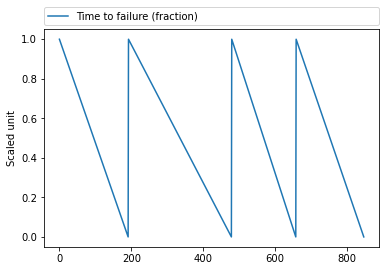

In [5]:
cycles = df.groupby('unit', as_index=False)['cycles'].max()
mx = cycles.iloc[0:4,1].sum()

plt.plot(df.afRUL[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()

In [6]:
# splitting train and test data, test size 20%

# train set
df_train = df[(df.unit <= 80)]
X_train = df_train[['cycles', 'Op1', 'Op2', 'S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12',
          'S13', 'S14', 'S15', 'S17', 'S20', 'S21']].values
y_train = df_train[['afRUL']].values.ravel()

# test set
df_test = df[(df.unit > 80)]
X_test = df_test[['cycles', 'Op1', 'Op2', 'S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12',
          'S13', 'S14', 'S15', 'S17', 'S20', 'S21']].values
y_test = df_test[['afRUL']].values.ravel()

df_train

,unit,cycles,Op1,Op2,S2,S3,S4,S7,S8,S9,...,S12,S13,S14,S15,S17,S20,S21,maxcycles,aRUL,afRUL
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,...,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,192,191,1.000000
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,...,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,192,190,0.994764
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,...,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,192,189,0.989529
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,...,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,192,188,0.984293
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,...,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,192,187,0.979058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,0.741379,0.666667,0.840361,0.724221,0.787812,0.384863,0.454545,0.555910,...,0.373134,0.426471,0.612499,0.748365,0.750000,0.193798,0.377796,185,4,0.021739
16134,80,182,0.419540,0.833333,0.783133,0.594724,0.743754,0.281804,0.393939,0.621466,...,0.292111,0.352941,0.629425,0.863409,0.666667,0.155039,0.165700,185,3,0.016304
16135,80,183,0.603448,0.500000,0.686747,0.704818,0.878629,0.310789,0.333333,0.588307,...,0.208955,0.485294,0.606461,0.714506,0.750000,0.155039,0.054543,185,2,0.010870
16136,80,184,0.362069,0.666667,0.789157,0.696970,0.809926,0.310789,0.409091,0.638832,...,0.219616,0.470588,0.664207,0.667180,0.750000,0.302326,0.142088,185,1,0.005435


In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# creating and training linear regression model
lreg = linear_model.LinearRegression()
lreg.fit(X_train, y_train)

# prediction
lreg_prediction = lreg.predict(X_test)

# RMSE
lreg_rmse = sqrt(mean_squared_error(y_test, lreg_prediction))
print("RMSE: ", lreg_rmse)

# r2 score
lreg_r2 = r2_score(y_test, lreg_prediction)
print("r2 score: ", lreg_r2)

RMSE:  0.12608198100553308
r2 score:  0.8109312970717999


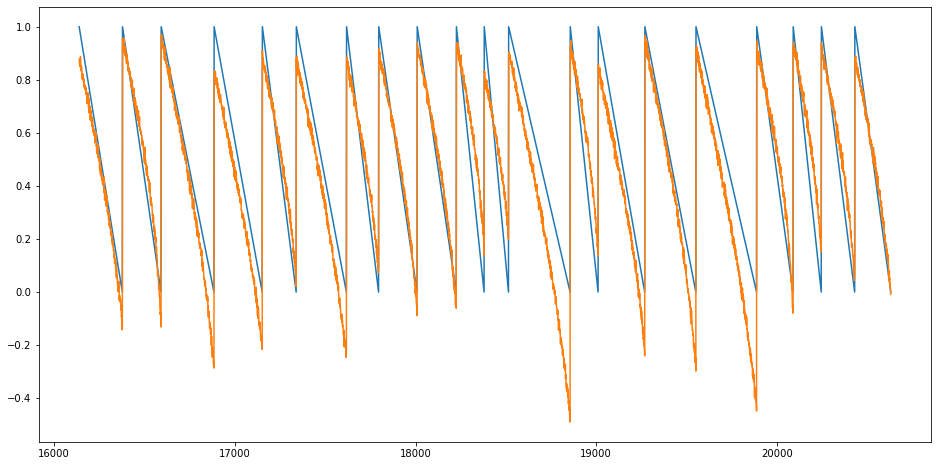

In [8]:
# remove warning
pd.options.mode.chained_assignment = None

# insert the lreg values into dataframe
df_test['lreg_predicted'] = lreg_prediction

# plotting the predicted and actual regression
plt.figure(figsize = (16, 8))
plt.plot(df_test.afRUL)
plt.plot(df_test.lreg_predicted)

In [9]:
# training the Polynomial regression model on training set  
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures

# transforms the existing features to higher degree features.
polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
preg = linear_model.LinearRegression()
preg.fit(X_train_poly, y_train)

# predicting on training dataset
preg_prediction = preg.predict(polynomial_features.fit_transform(X_test))

# RMSE
preg_rmse = sqrt(mean_squared_error(y_test, preg_prediction))
print("RMSE: ", preg_rmse)

# r2 score
preg_r2 = r2_score(y_test, preg_prediction)
print("r2 score: ", preg_r2)

RMSE:  0.0783184439368161
r2 score:  0.9270472449871741


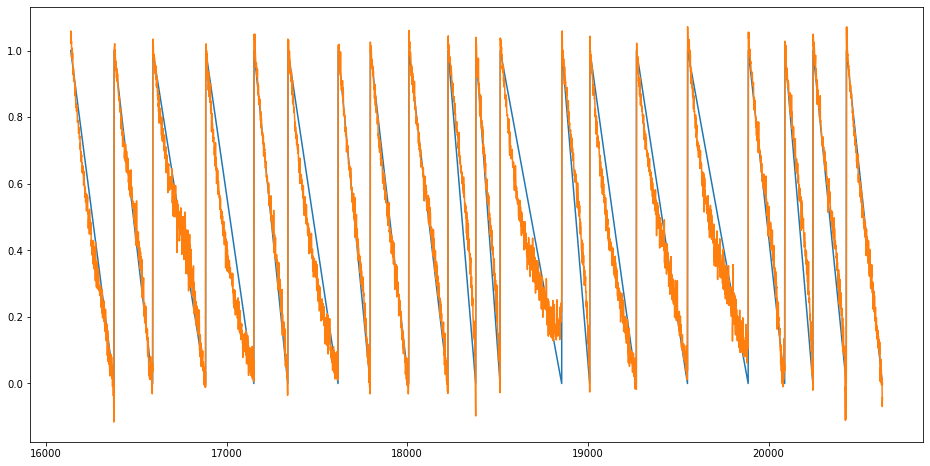

In [10]:
# insert the preg values into dataframe
df_test['preg_predicted'] = preg_prediction

# plotting the predicted and actual regression
plt.figure(figsize = (16, 8))
plt.plot(df_test.afRUL)
plt.plot(df_test.preg_predicted)

In [11]:
# training the svr model on training set 
from sklearn.svm import SVR

# creating and training Support Vector Regression model
# Using radial basis function
svr = SVR(kernel='rbf', C=90, gamma=0.08, epsilon=0.1)
svr.fit(X_train, y_train)

# making predictions on the testing set 
svr_pred = svr.predict(X_test) 

# RMSE
svr_rmse = sqrt(mean_squared_error(y_test, svr_pred))
print("RMSE: ", svr_rmse)

# r2 score
svr_r2 = r2_score(y_test, svr_pred)
print("r2 score: ", svr_r2)

RMSE:  0.08412112058189199
r2 score:  0.9158365178101766


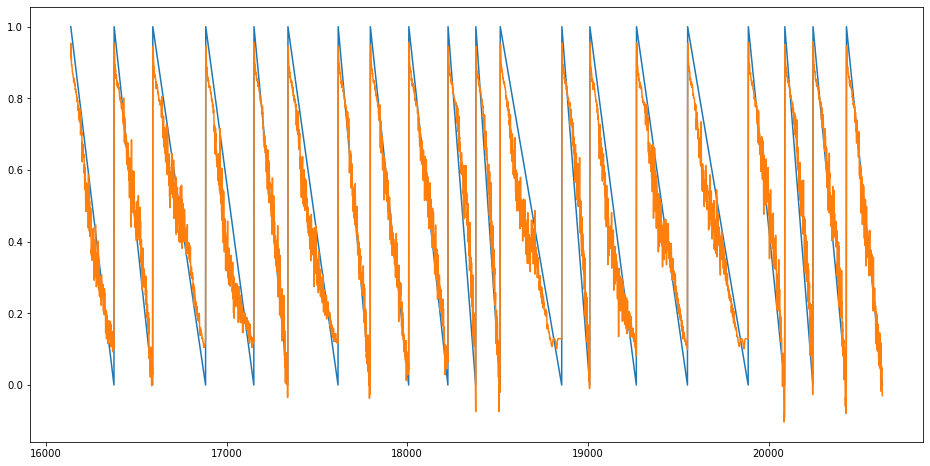

In [12]:
# insert the svr values into dataframe
df_test['svr_predicted'] = svr_pred

# plotting the predicted and actual regression
plt.figure(figsize = (16, 8))
plt.plot(df_test.afRUL)
plt.plot(df_test.svr_predicted)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

# making predictions on the testing set 
knr_pred = knr.predict(X_test)

# RMSE
knr_rmse = sqrt(mean_squared_error(y_test, knr_pred))
print("RMSE: ", knr_rmse)

# r2 score
knr_r2 = r2_score(y_test, knr_pred)
print("r2 score: ", knr_r2)

RMSE:  0.08640783401529313
r2 score:  0.9111985954962452


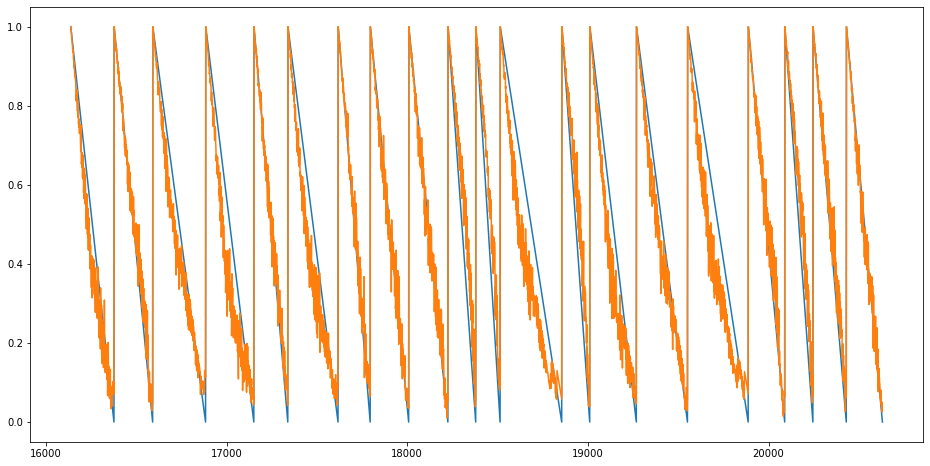

In [14]:
# insert the svr values into dataframe
df_test['knr_predicted'] = knr_pred

# plotting the predicted and actual regression
plt.figure(figsize = (16, 8))
plt.plot(df_test.afRUL)
plt.plot(df_test.knr_predicted)

In [15]:
# getting the datarame with the maximum cycles of each unit

idx = df_test.groupby('unit')['cycles'].transform(max) == df_test['cycles']
df_testmax = df_test[idx]

df_testmax

,unit,cycles,Op1,Op2,S2,S3,S4,S7,S8,S9,...,S17,S20,S21,maxcycles,aRUL,afRUL,lreg_predicted,preg_predicted,svr_predicted,knr_predicted
16377,81,240,0.350575,0.250000,0.843373,0.653368,0.698177,0.144928,0.575758,0.177286,...,0.750000,0.178295,0.185998,240,0,0.0,-0.117117,0.005254,0.108783,0.071055
16591,82,214,0.425287,0.750000,0.759036,0.667539,0.767725,0.276973,0.393939,0.869873,...,0.916667,0.325581,0.186413,214,0,0.0,-0.131649,0.035610,0.028611,0.052374
16884,83,293,0.488506,0.083333,0.771084,0.753216,0.816847,0.294686,0.530303,0.108813,...,0.750000,0.217054,0.135874,293,0,0.0,-0.286328,-0.010787,0.127606,0.114362
17151,84,267,0.367816,0.583333,0.743976,0.763898,0.808238,0.127214,0.530303,0.258054,...,0.666667,0.271318,0.286661,267,0,0.0,-0.216063,0.005467,0.120236,0.062153
17339,85,188,0.419540,0.500000,0.731928,0.698932,0.888420,0.222222,0.575758,0.131203,...,0.666667,0.364341,0.111848,188,0,0.0,0.050035,-0.025944,0.035671,0.044529
17617,86,278,0.488506,0.083333,0.584337,0.634838,0.729575,0.285024,0.500000,0.255766,...,0.833333,0.286822,0.138774,278,0,0.0,-0.231490,0.047680,0.118398,0.085806
17795,87,178,0.557471,0.583333,0.671687,0.580990,0.860905,0.223833,0.636364,0.129633,...,0.750000,0.364341,0.248274,178,0,0.0,0.096434,-0.009058,-0.026163,0.065154
18008,88,213,0.390805,0.750000,0.734940,0.693700,0.838454,0.307568,0.348485,0.574666,...,0.750000,0.240310,0.122480,213,0,0.0,-0.089260,0.008923,0.043818,0.034469
18225,89,217,0.844828,0.333333,0.593373,0.710050,0.828325,0.190016,0.409091,0.269631,...,0.750000,0.038760,0.270367,217,0,0.0,-0.060913,-0.029743,0.062621,0.054819
18379,90,154,0.442529,0.333333,0.719880,0.604971,0.873903,0.148148,0.636364,0.047608,...,0.583333,0.232558,0.246479,154,0,0.0,0.135582,-0.097488,-0.073992,0.059732


In [16]:
# # saving machine learning model to use in other files
# from joblib import dump

# dump(lreg, 'lreg_model.joblib')
# dump(preg, 'preg_model.joblib')
# dump(svr, 'svr_model.joblib')
# dump(knr, 'knr_model.joblib')

['knr_model.joblib']